<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98_%EB%AA%A8%EB%8D%B8%EB%A7%81(09-12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


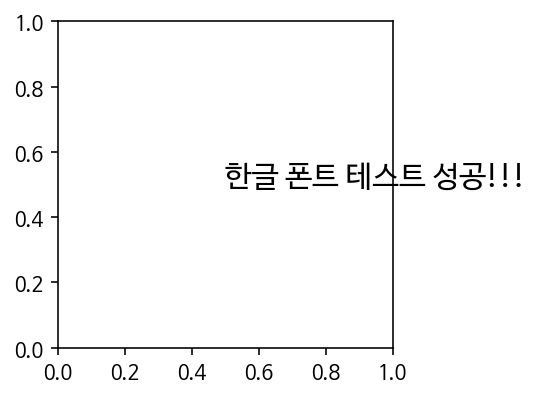

In [1]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")
newtrain_data= pd.read_excel("/content/drvie/MyDrive/train_weeks.xlsx")
newtrain_data=newtrain_data.drop(['Unnamed: 0'],axis=1)
newtrain_data

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_NAME_IMPORT_TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826
2,2015-12-28,노르웨이,노르웨이,판매용,연어(냉장),2266692,256289,8.844281
3,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755
4,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815
...,...,...,...,...,...,...,...,...
9398,2019-12-30,페루,페루,판매용,"오징어(냉동,동체)",753168,330070,2.281843
9399,2019-12-30,페루,페루,판매용,"오징어(냉동,동체,자숙)",790438,150010,5.269235
9400,2019-12-30,페루,페루,판매용,"오징어(냉동,지느러미)",351783,199870,1.760059
9401,2019-12-30,페루,페루,판매용,"오징어(냉동,지느러미,자숙)",206466,51876,3.979991


In [3]:
newtrain_data=newtrain_data.drop(['CTRY_2'],axis=1)

In [4]:
newtrain_data['P_NAME']=newtrain_data['P_NAME_IMPORT_TYPE'].str.slice(start=0, stop=2)
newtrain_data 

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME_IMPORT_TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036,연어
1,2015-12-28,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,판매용,연어(냉장),2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...
9398,2019-12-30,페루,판매용,"오징어(냉동,동체)",753168,330070,2.281843,오징
9399,2019-12-30,페루,판매용,"오징어(냉동,동체,자숙)",790438,150010,5.269235,오징
9400,2019-12-30,페루,판매용,"오징어(냉동,지느러미)",351783,199870,1.760059,오징
9401,2019-12-30,페루,판매용,"오징어(냉동,지느러미,자숙)",206466,51876,3.979991,오징


In [5]:
squid_kg = newtrain_data[newtrain_data['P_NAME'] == "오징"]
squid_kg['P_NAME']=squid_kg['P_NAME_IMPORT_TYPE'].str.slice(start=0, stop=3)
salmon_kg = newtrain_data[newtrain_data['P_NAME'] == "연어"]
salmon_kg['P_NAME']=salmon_kg['P_NAME_IMPORT_TYPE'].str.slice(start=0, stop=2)
shrimp_kg = newtrain_data[newtrain_data['P_NAME'] == "흰다"]
shrimp_kg['P_NAME']=shrimp_kg['P_NAME_IMPORT_TYPE'].str.slice(start=0, stop=5)

In [6]:
shrimp_kg_total=shrimp_kg.groupby('REG_DATE')['TOTAL_KG'].agg(**{'KSUM':'sum'}).reset_index()
squid_kg_total=squid_kg.groupby('REG_DATE')['TOTAL_KG'].agg(**{'KSUM':'sum'}).reset_index()
salmon_kg_total=salmon_kg.groupby('REG_DATE')['TOTAL_KG'].agg(**{'KSUM':'sum'}).reset_index()

In [7]:
salmon_train = train_data[train_data['CATEGORY_2'] == "연어"] 
salmon_train=salmon_train[salmon_train['P_NAME'] == "연어"]
salmon_train = salmon_train.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
salmon_train_df=salmon_train.drop(["CTRY_2","CATEGORY_1","CATEGORY_2",'P_TYPE'],axis=1)
salmon_train_df = salmon_train_df.sort_values(by=['REG_DATE']) 
squid_train = train_data[train_data['CATEGORY_2'] == "오징어"] 
squid_train=squid_train[squid_train['P_NAME'] == "오징어"]
squid_train = squid_train.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
squid_train_df=squid_train.drop(["CTRY_2","CATEGORY_1","CATEGORY_2",'P_TYPE'],axis=1)
squid_train_df = squid_train_df.sort_values(by=['REG_DATE']) 
shrimp_train = train_data[train_data['CATEGORY_2'] == "새우"] 
shrimp_train=shrimp_train[shrimp_train['P_NAME'] == "흰다리새우"]
shrimp_train = shrimp_train.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
shrimp_train_df=shrimp_train.drop(["CTRY_2","CATEGORY_1","CATEGORY_2",'P_TYPE'],axis=1)
shrimp_train_df = shrimp_train_df.sort_values(by=['REG_DATE']) 
target_data=pd.concat([salmon_train_df,squid_train_df,shrimp_train_df])
target_data

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
198,2015-12-28,노르웨이,판매용,연어,냉장,8.844281
74,2015-12-28,노르웨이,판매용,연어,"냉장,필렛(F)",12.936815
174,2015-12-28,노르웨이,자사제품제조용,연어,"냉장,필렛(F)",13.425826
129,2015-12-28,노르웨이,판매용,연어,"냉장,포장횟감,필렛(F)",19.146755
168,2015-12-28,노르웨이,판매용,연어,"냉장,필렛(F),횟감",12.082384
...,...,...,...,...,...,...
42005,2019-12-30,에콰도르,판매용,흰다리새우,냉동,6.739527
41980,2019-12-30,태국,판매용,흰다리새우,냉장,11.500000
41932,2019-12-30,베트남,판매용,흰다리새우,"냉동,살,자숙,포장횟감",13.953618
41972,2019-12-30,중국,판매용,흰다리새우,"냉동,살",7.212049


In [8]:
shrimp_final=pd.merge(shrimp_kg,shrimp_kg_total,on='REG_DATE')
squid_final=pd.merge(squid_kg,squid_kg_total,on='REG_DATE')
salmon_final=pd.merge(salmon_kg,salmon_kg_total,on='REG_DATE')

In [9]:
data = [salmon_final,squid_final,shrimp_final]

for i in data:
    i['PER']= i['KSUM']/len(i['KSUM'])

In [10]:
salmon_final['PER']=salmon_final['KSUM']/len(salmon_final['KSUM'])
salmon_final

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME_IMPORT_TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE,P_NAME,KSUM,PER
0,2015-12-28,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036,연어,335028,183.376026
1,2015-12-28,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826,연어,335028,183.376026
2,2015-12-28,노르웨이,판매용,연어(냉장),2266692,256289,8.844281,연어,335028,183.376026
3,2015-12-28,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755,연어,335028,183.376026
4,2015-12-28,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815,연어,335028,183.376026
...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-30,미국,외화획득용 원료,연어(냉동),952,136,7.000000,연어,520922,285.124247
1823,2019-12-30,미국,판매용,"연어(냉동,필렛(F))",25043,2862,8.750175,연어,520922,285.124247
1824,2019-12-30,아이슬란드,판매용,연어(냉장),51441,4190,12.277088,연어,520922,285.124247
1825,2019-12-30,영국,판매용,연어(냉장),11083,828,13.385266,연어,520922,285.124247


In [11]:
salmon_final['P_NAME_IMPORT_TYPE']=salmon_final['P_NAME_IMPORT_TYPE'].str.replace(pat=r'[연어()]', repl= r' ', regex=True)
salmon_final['P_NAME_IMPORT_TYPE']=salmon_final['P_NAME_IMPORT_TYPE'].str.replace(pat=r'[F]', repl= r'(F) ', regex=True)
salmon_final['P_NAME_IMPORT_TYPE']=salmon_final['P_NAME_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
salmon_final.columns=['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','TOTAL_PRICE','TOTOAL_KG','P_PRICE','P_NAME','KSUM','PER']
salmon_merge = pd.merge(salmon_final,salmon_train_df,how='inner',on = ['REG_DATE', 'CTRY_1','P_PURPOSE','P_NAME','P_IMPORT_TYPE'])
salmon_merge

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어,335028,183.376026,13.425826
1,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어,335028,183.376026,8.844281
2,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어,335028,183.376026,19.146755
3,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어,335028,183.376026,12.936815
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F),횟감",196230,16241,12.082384,연어,335028,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
1474,2019-12-30,노르웨이,판매용,"냉장,포장횟감,필렛(F)",11440,380,30.105263,연어,520922,285.124247,30.090909
1475,2019-12-30,노르웨이,판매용,"냉장,필렛(F)",68831,4172,16.498322,연어,520922,285.124247,16.495971
1476,2019-12-30,노르웨이,판매용,"냉장,필렛(F),횟감",112614,6137,18.350008,연어,520922,285.124247,18.350634
1477,2019-12-30,아이슬란드,판매용,냉장,51441,4190,12.277088,연어,520922,285.124247,12.277997


In [12]:
salmon_merge

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어,335028,183.376026,13.425826
1,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어,335028,183.376026,8.844281
2,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어,335028,183.376026,19.146755
3,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어,335028,183.376026,12.936815
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F),횟감",196230,16241,12.082384,연어,335028,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
1474,2019-12-30,노르웨이,판매용,"냉장,포장횟감,필렛(F)",11440,380,30.105263,연어,520922,285.124247,30.090909
1475,2019-12-30,노르웨이,판매용,"냉장,필렛(F)",68831,4172,16.498322,연어,520922,285.124247,16.495971
1476,2019-12-30,노르웨이,판매용,"냉장,필렛(F),횟감",112614,6137,18.350008,연어,520922,285.124247,18.350634
1477,2019-12-30,아이슬란드,판매용,냉장,51441,4190,12.277088,연어,520922,285.124247,12.277997


In [13]:
shrimp_final['P_NAME_IMPORT_TYPE']=shrimp_final['P_NAME_IMPORT_TYPE'].str.replace(pat=r'[흰다리새우()]', repl= r' ', regex=True)
shrimp_final.columns=['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','TOTAL_PRICE','TOTOAL_KG','P_PRICE','P_NAME','KSUM','PER']

In [14]:
shrimp_final.head(10)

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE,P_NAME,KSUM,PER
0,2015-12-28,말레이시아,판매용,냉동,258332,41858,6.171628,흰다리새우,789103,216.133388
1,2015-12-28,말레이시아,판매용,"냉동,자숙",5244,760,6.900000,흰다리새우,789103,216.133388
2,2015-12-28,베트남,판매용,냉동,371077,57290,6.477169,흰다리새우,789103,216.133388
3,2015-12-28,베트남,판매용,"냉동,살",2130856,253628,8.401501,흰다리새우,789103,216.133388
4,2015-12-28,베트남,판매용,"냉동,살,자숙",610679,82269,7.422954,흰다리새우,789103,216.133388
5,2015-12-28,베트남,판매용,"냉동,살,자숙,포장횟감",353875,22562,15.684558,흰다리새우,789103,216.133388
6,2015-12-28,베트남,판매용,"냉동,살,포장횟감",120387,9330,12.903215,흰다리새우,789103,216.133388
7,2015-12-28,사우디아라비아,판매용,냉동,312048,51840,6.019444,흰다리새우,789103,216.133388
8,2015-12-28,에콰도르,판매용,냉동,888472,107280,8.281805,흰다리새우,789103,216.133388
9,2015-12-28,인도네시아,판매용,냉동,109506,15828,6.918499,흰다리새우,789103,216.133388


In [15]:
shrimp_final.shape

(3651, 10)

In [16]:
shrimp_train_df.shape

(2601, 6)

In [17]:
shrimp_final['CTRY_1'].value_counts()

베트남        1163
태국         1007
인도네시아       295
중국          252
말레이시아       248
인도          219
에콰도르        207
페루           96
사우디아라비아      92
필리핀          28
콜롬비아         19
파나마          13
모잠비크          3
스페인           2
미얀마           2
이란            2
기니            1
파키스탄          1
시에라리온         1
Name: CTRY_1, dtype: int64

In [18]:
shrimp_train_df.head(10)

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
103,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙,포장횟감",19.653302
132,2015-12-28,태국,판매용,흰다리새우,냉장,9.125593
113,2015-12-28,에콰도르,판매용,흰다리새우,냉동,8.281805
118,2015-12-28,말레이시아,판매용,흰다리새우,냉동,6.171628
188,2015-12-28,베트남,판매용,흰다리새우,"냉동,살",8.401501
28,2015-12-28,페루,판매용,흰다리새우,냉동,6.100000
83,2015-12-28,사우디아라비아,판매용,흰다리새우,냉동,6.019444
36,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙",13.377047
37,2015-12-28,태국,판매용,흰다리새우,"냉동,살",15.050566
9,2015-12-28,중국,판매용,흰다리새우,"냉동,살",6.972132


In [19]:
shrimp_train_df['CTRY_1'].value_counts()

베트남        1018
태국          741
에콰도르        198
말레이시아       191
중국          161
인도          103
사우디아라비아      66
인도네시아        59
페루           49
파나마           7
콜롬비아          4
필리핀           4
Name: CTRY_1, dtype: int64

In [20]:
shrimp_train_df['P_IMPORT_TYPE'].unique()

array(['냉동,살,자숙,포장횟감', '냉장', '냉동', '냉동,살', '냉동,살,자숙', '냉동,살,포장횟감',
       '냉동,자숙'], dtype=object)

In [21]:
shrimp_final['P_IMPORT_TYPE'].unique()

array(['      냉동 ', '      냉동,자숙 ', '      냉동,살 ', '      냉동,살,자숙 ',
       '      냉동,살,자숙,포장횟감 ', '      냉동,살,포장횟감 ', '      냉장 ',
       '      냉동,자숙,횟감 '], dtype=object)

In [22]:
shrimp_final['P_IMPORT_TYPE']=shrimp_final['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)

In [23]:
shrimp_final['P_IMPORT_TYPE']=shrimp_final['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
shrimp_merge = pd.merge(shrimp_train_df,shrimp_final,how='inner',on = ['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME'])
shrimp_merge

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_PRICE,TOTOAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙,포장횟감",19.653302,297040,15114,19.653302,789103,216.133388
1,2015-12-28,태국,판매용,흰다리새우,냉장,9.125593,32697,3583,9.125593,789103,216.133388
2,2015-12-28,에콰도르,판매용,흰다리새우,냉동,8.281805,888472,107280,8.281805,789103,216.133388
3,2015-12-28,말레이시아,판매용,흰다리새우,냉동,6.171628,258332,41858,6.171628,789103,216.133388
4,2015-12-28,베트남,판매용,흰다리새우,"냉동,살",8.401501,2130856,253628,8.401501,789103,216.133388
...,...,...,...,...,...,...,...,...,...,...,...
2599,2019-12-30,에콰도르,판매용,흰다리새우,냉동,6.739527,802597,119088,6.739529,671894,184.030129
2600,2019-12-30,태국,판매용,흰다리새우,냉장,11.500000,12880,1120,11.500000,671894,184.030129
2601,2019-12-30,베트남,판매용,흰다리새우,"냉동,살,자숙,포장횟감",13.953618,99880,7158,13.953618,671894,184.030129
2602,2019-12-30,중국,판매용,흰다리새우,"냉동,살",7.212049,470478,65235,7.212049,671894,184.030129


In [24]:
squid_final.columns=['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','TOTAL_PRICE','TOTOAL_KG','P_PRICE','P_NAME','KSUM','PER']
squid_final['P_IMPORT_TYPE']=squid_final['P_IMPORT_TYPE'].str.replace(pat=r'[오징어()]', repl= r'', regex=True)
squid_final['P_IMPORT_TYPE']=squid_final['P_IMPORT_TYPE'].str.replace(pat=r' ', repl= r'', regex=True)

In [25]:
squid_final.shape

(3925, 10)

In [26]:
squid_train_df.shape

(2150, 6)

In [27]:
squid_merge = pd.merge(squid_train_df,squid_final,how='inner',on = ['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME'])
squid_merge

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_PRICE,TOTOAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,중국,판매용,오징어,"냉동,동체",0.793729,102768,129475,0.793729,1460501,372.102166
1,2015-12-28,페루,판매용,오징어,"냉동,동체,자숙",5.481140,730636,133300,5.481140,1460501,372.102166
2,2015-12-28,대만,판매용,오징어,"냉동,동체",1.989999,728670,366166,1.989999,1460501,372.102166
3,2015-12-28,페루,판매용,오징어,"냉동,다리",1.233434,29598,22000,1.345364,1460501,372.102166
4,2015-12-28,페루,판매용,오징어,"냉동,다리",1.233434,163800,132800,1.233434,1460501,372.102166
...,...,...,...,...,...,...,...,...,...,...,...
2242,2019-12-30,칠레,판매용,오징어,"냉동,동체",2.247963,216736,96340,2.249699,2904417,739.978854
2243,2019-12-30,중국,판매용,오징어,냉동,4.108244,5435876,1323163,4.108244,2904417,739.978854
2244,2019-12-30,페루,판매용,오징어,"냉동,동체,자숙",5.269235,790438,150010,5.269235,2904417,739.978854
2245,2019-12-30,페루,판매용,오징어,"냉동,다리",2.425554,28476,11740,2.425554,2904417,739.978854


In [28]:
shrimp_merge.groupby(['P_IMPORT_TYPE','REG_DATE']).sum()

P_PRICE_x  TOTAL_PRICE  ...     KSUM          PER
P_IMPORT_TYPE REG_DATE                            ...                      
냉동            2015-12-28  33.050046      1940461  ...  3945515  1080.666941
              2016-01-04  37.902077      2024371  ...  3411090   934.289236
              2016-01-11  29.065495      2213580  ...  3123088   855.406190
              2016-01-18  26.732551      1813383  ...  2578840   706.337990
              2016-01-25  32.620800      2580200  ...  4389105  1202.165160
...                             ...          ...  ...      ...          ...
냉장            2019-12-02  11.500000        18032  ...   720091   197.231170
              2019-12-09  11.500000        15180  ...   941920   257.989592
              2019-12-16  11.500000        22586  ...  1025785   280.960011
              2019-12-23  11.500000        70794  ...   987925   270.590249
              2019-12-30  11.500000        12880  ...   671894   184.030129

[1308 rows x 6 columns]

In [29]:
shrimp_merge.groupby(['CTRY_1','REG_DATE']).sum()

P_PRICE_x  TOTAL_PRICE  ...     KSUM         PER
CTRY_1 REG_DATE                            ...                     
말레이시아  2015-12-28   6.171628       258332  ...   789103  216.133388
       2016-01-04   7.189045       163407  ...   682218  186.857847
       2016-01-11   6.034737       638620  ...   780772  213.851548
       2016-01-18   6.098839       312535  ...   644710  176.584497
       2016-01-25   6.217627       347099  ...   877821  240.433032
...                      ...          ...  ...      ...         ...
페루     2019-12-09   6.463125       271529  ...   941920  257.989592
필리핀    2017-05-15   6.511924       160663  ...   856849  234.688852
       2018-09-10   7.803751       136472  ...  1851240  507.050123
       2018-11-05   9.233010       204881  ...  1227265  336.144892
       2018-12-24   7.411009        88500  ...  1280749  350.794029

[1195 rows x 6 columns]

In [30]:
shrimp = shrimp_merge
salmon = salmon_merge
squid = squid_merge

In [31]:
shrimp.head(5)

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_PRICE,TOTOAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙,포장횟감",19.653302,297040,15114,19.653302,789103,216.133388
1,2015-12-28,태국,판매용,흰다리새우,냉장,9.125593,32697,3583,9.125593,789103,216.133388
2,2015-12-28,에콰도르,판매용,흰다리새우,냉동,8.281805,888472,107280,8.281805,789103,216.133388
3,2015-12-28,말레이시아,판매용,흰다리새우,냉동,6.171628,258332,41858,6.171628,789103,216.133388
4,2015-12-28,베트남,판매용,흰다리새우,"냉동,살",8.401501,2130856,253628,8.401501,789103,216.133388


In [32]:
salmon.head(5)

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어,335028,183.376026,13.425826
1,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어,335028,183.376026,8.844281
2,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어,335028,183.376026,19.146755
3,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어,335028,183.376026,12.936815
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F),횟감",196230,16241,12.082384,연어,335028,183.376026,12.082384


In [33]:
squid.head(5)

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_PRICE,TOTOAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,중국,판매용,오징어,"냉동,동체",0.793729,102768,129475,0.793729,1460501,372.102166
1,2015-12-28,페루,판매용,오징어,"냉동,동체,자숙",5.481140,730636,133300,5.481140,1460501,372.102166
2,2015-12-28,대만,판매용,오징어,"냉동,동체",1.989999,728670,366166,1.989999,1460501,372.102166
3,2015-12-28,페루,판매용,오징어,"냉동,다리",1.233434,29598,22000,1.345364,1460501,372.102166
4,2015-12-28,페루,판매용,오징어,"냉동,다리",1.233434,163800,132800,1.233434,1460501,372.102166


In [34]:
full_data = pd.concat([salmon,shrimp,squid])
full_data1 =full_data.copy()

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
col=['CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME']
for i in col:
  le = LabelEncoder()
  le= le.fit(full_data[i])
  full_data1[i] = le.transform(full_data[i])

full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,1,2,19,701298,52235,13.425826,0,335028,183.376026,13.425826
1,2015-12-28,1,3,17,2266692,256289,8.844281,0,335028,183.376026,8.844281
2,2015-12-28,1,3,18,25963,1356,19.146755,0,335028,183.376026,19.146755
3,2015-12-28,1,3,19,35421,2738,12.936815,0,335028,183.376026,12.936815
4,2015-12-28,1,3,20,196230,16241,12.082384,0,335028,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
2242,2019-12-30,20,3,6,216736,96340,2.247963,1,2904417,739.978854,2.249699
2243,2019-12-30,19,3,1,5435876,1323163,4.108244,1,2904417,739.978854,4.108244
2244,2019-12-30,25,3,7,790438,150010,5.269235,1,2904417,739.978854,5.269235
2245,2019-12-30,25,3,4,28476,11740,2.425554,1,2904417,739.978854,2.425554


In [37]:
full_data

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어,335028,183.376026,13.425826
1,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어,335028,183.376026,8.844281
2,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어,335028,183.376026,19.146755
3,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어,335028,183.376026,12.936815
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F),횟감",196230,16241,12.082384,연어,335028,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
2242,2019-12-30,칠레,판매용,"냉동,동체",216736,96340,2.247963,오징어,2904417,739.978854,2.249699
2243,2019-12-30,중국,판매용,냉동,5435876,1323163,4.108244,오징어,2904417,739.978854,4.108244
2244,2019-12-30,페루,판매용,"냉동,동체,자숙",790438,150010,5.269235,오징어,2904417,739.978854,5.269235
2245,2019-12-30,페루,판매용,"냉동,다리",28476,11740,2.425554,오징어,2904417,739.978854,2.425554


In [38]:
squid_train_df.tail(10)

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
41986,2019-12-30,칠레,판매용,오징어,"냉동,지느러미",1.796916
42045,2019-12-30,페루,판매용,오징어,"냉동,동체",2.281843
41919,2019-12-30,페루,자사제품제조용,오징어,"냉동,동체,자숙",3.780071
41939,2019-12-30,칠레,판매용,오징어,"냉동,다리",2.278331
41993,2019-12-30,중국,판매용,오징어,"냉동,동체",3.906298
42016,2019-12-30,칠레,판매용,오징어,"냉동,동체",2.247963
42067,2019-12-30,중국,판매용,오징어,냉동,4.108244
42021,2019-12-30,페루,판매용,오징어,"냉동,동체,자숙",5.269235
41953,2019-12-30,페루,판매용,오징어,"냉동,다리",2.425554
41918,2019-12-30,페루,판매용,오징어,"냉동,지느러미,자숙",3.979991


In [39]:
squid_final.tail(10)

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE,P_NAME,KSUM,PER
3915,2019-12-30,칠레,판매용,"냉동,지느러미",48948,27240,1.796916,오징어,2904417,739.978854
3916,2019-12-30,페루,자사제품제조용,"냉동,동체,자숙",424880,112400,3.780071,오징어,2904417,739.978854
3917,2019-12-30,페루,자사제품제조용,"냉동,지느러미",36300,22000,1.650000,오징어,2904417,739.978854
3918,2019-12-30,페루,자사제품제조용,"냉동,지느러미,자숙",350320,88020,3.980005,오징어,2904417,739.978854
3919,2019-12-30,페루,판매용,"냉동,다리",28476,11740,2.425554,오징어,2904417,739.978854
3920,2019-12-30,페루,판매용,"냉동,다리,자숙",42822,14274,3.000000,오징어,2904417,739.978854
3921,2019-12-30,페루,판매용,"냉동,동체",753168,330070,2.281843,오징어,2904417,739.978854
3922,2019-12-30,페루,판매용,"냉동,동체,자숙",790438,150010,5.269235,오징어,2904417,739.978854
3923,2019-12-30,페루,판매용,"냉동,지느러미",351783,199870,1.760059,오징어,2904417,739.978854
3924,2019-12-30,페루,판매용,"냉동,지느러미,자숙",206466,51876,3.979991,오징어,2904417,739.978854


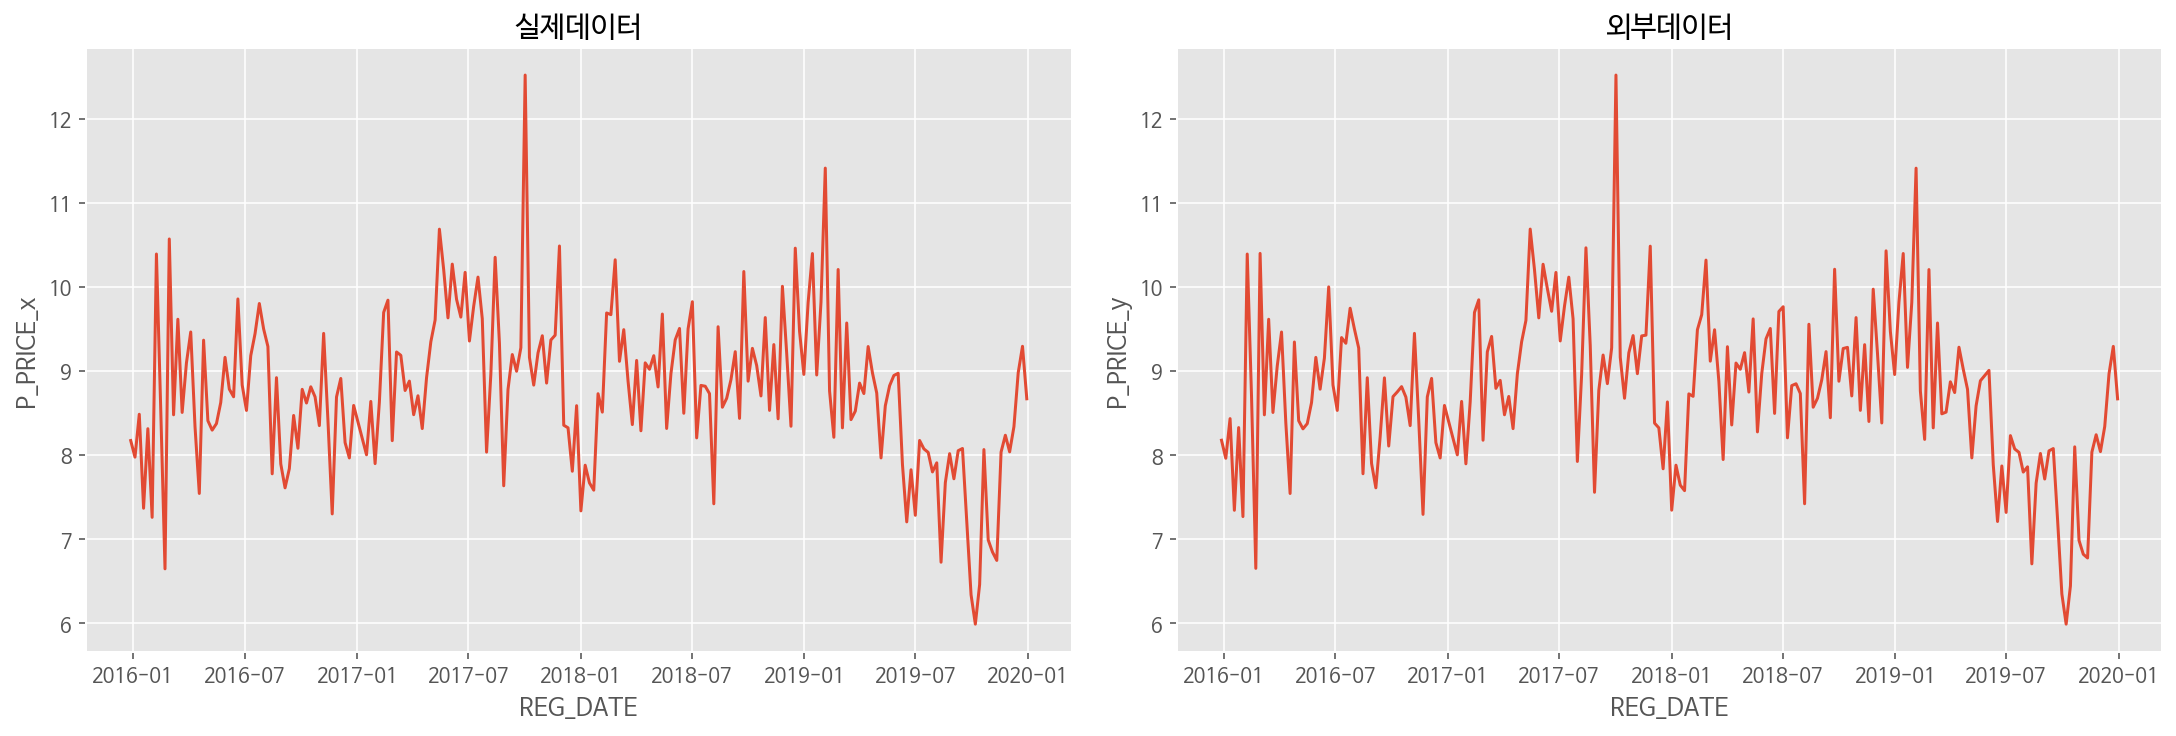

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.lineplot(x='REG_DATE',y='P_PRICE_x',data=full_data,ci=None,ax=axes[0])
axes[0].set_title("실제데이터")
sns.lineplot(x='REG_DATE',y='P_PRICE_y',data=full_data,ci=None,ax=axes[1])
axes[1].set_title("외부데이터")
plt.show()

In [41]:
train_salmon = full_data1[full_data1['P_NAME'] ==  0]
train_salmon = train_salmon.drop(['P_NAME'],axis=1)
train_salmon

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,KSUM,PER,P_PRICE_y
0,2015-12-28,1,2,19,701298,52235,13.425826,335028,183.376026,13.425826
1,2015-12-28,1,3,17,2266692,256289,8.844281,335028,183.376026,8.844281
2,2015-12-28,1,3,18,25963,1356,19.146755,335028,183.376026,19.146755
3,2015-12-28,1,3,19,35421,2738,12.936815,335028,183.376026,12.936815
4,2015-12-28,1,3,20,196230,16241,12.082384,335028,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...
1474,2019-12-30,1,3,18,11440,380,30.105263,520922,285.124247,30.090909
1475,2019-12-30,1,3,19,68831,4172,16.498322,520922,285.124247,16.495971
1476,2019-12-30,1,3,20,112614,6137,18.350008,520922,285.124247,18.350634
1477,2019-12-30,12,3,17,51441,4190,12.277088,520922,285.124247,12.277997


In [42]:
salmon_train_df.head(5)

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
198,2015-12-28,노르웨이,판매용,연어,냉장,8.844281
74,2015-12-28,노르웨이,판매용,연어,"냉장,필렛(F)",12.936815
174,2015-12-28,노르웨이,자사제품제조용,연어,"냉장,필렛(F)",13.425826
129,2015-12-28,노르웨이,판매용,연어,"냉장,포장횟감,필렛(F)",19.146755
168,2015-12-28,노르웨이,판매용,연어,"냉장,필렛(F),횟감",12.082384


In [43]:
salmon_final.head(5)

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE,P_NAME,KSUM,PER
0,2015-12-28,노르웨이,자사제품제조용,냉장,46217,5502,8.400036,연어,335028,183.376026
1,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어,335028,183.376026
2,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어,335028,183.376026
3,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어,335028,183.376026
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어,335028,183.376026


In [44]:
test_data= pd.read_excel("/content/drvie/MyDrive/valildset.xlsx")
test_data

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2020-01-06,수산물,호주,일본,판매용,어류,참치 새치류,남방참다랑어,"냉동,목살",4.883410
1,2020-01-06,수산물,칠레,일본,자사제품제조용,어류,연어,은연어,냉동,5.391782
2,2020-01-06,수산물,중국,중국,판매용,어류,도다리,강도다리,활,6.764961
3,2020-01-06,수산물,중국,중국,판매용,어류,복어,자주복,활,18.499875
4,2020-01-06,수산물,중국,중국,판매용,어류,복어,은밀복,냉동,3.071645
...,...,...,...,...,...,...,...,...,...,...
9474,2020-12-28,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,냉장,5.900000
9475,2020-12-28,수산물,일본,일본,판매용,어류,방어,방어,활,7.780000
9476,2020-12-28,수산물,노르웨이,노르웨이,판매용,어류,고등어,고등어,냉동,1.970000
9477,2020-12-28,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,12.540000


In [45]:
y = test_data['P_PRICE']
test_data = test_data.drop(['P_PRICE'],axis=1) 

In [46]:
test_data_salmon = test_data[test_data['P_NAME'] == "연어"]
test_data_squid = test_data[test_data['P_NAME'] == "오징어"]
test_data_shrimp = test_data[test_data['P_NAME'] == "흰다리새우"]

In [47]:
test_full_data = pd.concat([test_data_salmon,test_data_shrimp,test_data_squid])
test_full_data = test_full_data.drop(['P_TYPE','CTRY_2','CATEGORY_1','CATEGORY_2'],axis=1)
test_full_data

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE
22,2020-01-06,영국,판매용,연어,냉장
37,2020-01-06,노르웨이,판매용,연어,"냉장,포장횟감,필렛(F)"
94,2020-01-06,노르웨이,자사제품제조용,연어,냉장
195,2020-01-06,노르웨이,판매용,연어,"냉장,필렛(F)"
196,2020-01-06,노르웨이,자사제품제조용,연어,"냉장,필렛(F)"
...,...,...,...,...,...
9421,2020-12-28,페루,판매용,오징어,"냉동,다리"
9422,2020-12-28,페루,판매용,오징어,"냉동,동체,자숙"
9428,2020-12-28,페루,판매용,오징어,"냉동,지느러미"
9433,2020-12-28,중국,판매용,오징어,"냉동,동체"


In [48]:
real_full_data = pd.concat([full_data,test_full_data])
real_full_data

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298.0,52235.0,13.425826,연어,335028.0,183.376026,13.425826
1,2015-12-28,노르웨이,판매용,냉장,2266692.0,256289.0,8.844281,연어,335028.0,183.376026,8.844281
2,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963.0,1356.0,19.146755,연어,335028.0,183.376026,19.146755
3,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421.0,2738.0,12.936815,연어,335028.0,183.376026,12.936815
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F),횟감",196230.0,16241.0,12.082384,연어,335028.0,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
9421,2020-12-28,페루,판매용,"냉동,다리",NaN,NaN,NaN,오징어,NaN,NaN,NaN
9422,2020-12-28,페루,판매용,"냉동,동체,자숙",NaN,NaN,NaN,오징어,NaN,NaN,NaN
9428,2020-12-28,페루,판매용,"냉동,지느러미",NaN,NaN,NaN,오징어,NaN,NaN,NaN
9433,2020-12-28,중국,판매용,"냉동,동체",NaN,NaN,NaN,오징어,NaN,NaN,NaN


In [49]:
real_full_data1 = real_full_data.copy()

In [50]:
col=['CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME']
for i in col:
  le = LabelEncoder()
  le= le.fit(real_full_data[i])
  real_full_data1[i] = le.transform(real_full_data[i])

real_full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,1,3,21,701298.0,52235.0,13.425826,0,335028.0,183.376026,13.425826
1,2015-12-28,1,4,19,2266692.0,256289.0,8.844281,0,335028.0,183.376026,8.844281
2,2015-12-28,1,4,20,25963.0,1356.0,19.146755,0,335028.0,183.376026,19.146755
3,2015-12-28,1,4,21,35421.0,2738.0,12.936815,0,335028.0,183.376026,12.936815
4,2015-12-28,1,4,22,196230.0,16241.0,12.082384,0,335028.0,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
9421,2020-12-28,26,4,4,NaN,NaN,NaN,1,NaN,NaN,NaN
9422,2020-12-28,26,4,7,NaN,NaN,NaN,1,NaN,NaN,NaN
9428,2020-12-28,26,4,15,NaN,NaN,NaN,1,NaN,NaN,NaN
9433,2020-12-28,20,4,6,NaN,NaN,NaN,1,NaN,NaN,NaN


In [51]:
data = [real_full_data,real_full_data1]

for i in data : 
    print(i.CTRY_1.unique())
    print(i.P_PURPOSE.unique())
    print(i.P_IMPORT_TYPE.unique())
    print(i.P_NAME.unique())

['노르웨이' '캐나다' '영국' '칠레' '아일랜드' '미국' '러시아' '아이슬란드' '뉴질랜드' '호주' '태국' '에콰도르'
 '말레이시아' '베트남' '페루' '사우디아라비아' '중국' '인도' '인도네시아' '파나마' '필리핀' '콜롬비아' '대만'
 '대한민국' '아르헨티나' '바누아투' '나미비아' '우루과이' '스페인']
['자사제품제조용' '판매용' '외화획득용 원료' '반송품(기타)' '외화획득용 제품']
['냉장,필렛(F)' '냉장' '냉장,포장횟감,필렛(F)' '냉장,필렛(F),횟감' '냉동' '냉동,곤이' '냉동,필렛(F)'
 '냉동,살,자숙,포장횟감' '냉동,살' '냉동,살,자숙' '냉동,살,포장횟감' '냉동,자숙' '냉동,동체' '냉동,동체,자숙'
 '냉동,다리' '냉동,지느러미' '냉동,다리,자숙' '냉동,지느러미,자숙' '냉동,난포선' '냉동,동체,포장횟감' '건조'
 '냉동,포장횟감,필렛(F)' '냉동,슬라이스(S)']
['연어' '흰다리새우' '오징어']
[ 1 22 16 21 14  7  5 13  2 28 24 15  6  9 26 10 20 18 19 25 27 23  3  4
 12  8  0 17 11]
[3 4 1 0 2]
[21 19 20 22  1  2 18 11  9 10 12 14  6  7  4 15  5 16  3  8  0 17 13]
[0 2 1]


In [52]:
real_full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_PRICE,TOTOAL_KG,P_PRICE_x,P_NAME,KSUM,PER,P_PRICE_y
0,2015-12-28,1,3,21,701298.0,52235.0,13.425826,0,335028.0,183.376026,13.425826
1,2015-12-28,1,4,19,2266692.0,256289.0,8.844281,0,335028.0,183.376026,8.844281
2,2015-12-28,1,4,20,25963.0,1356.0,19.146755,0,335028.0,183.376026,19.146755
3,2015-12-28,1,4,21,35421.0,2738.0,12.936815,0,335028.0,183.376026,12.936815
4,2015-12-28,1,4,22,196230.0,16241.0,12.082384,0,335028.0,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
9421,2020-12-28,26,4,4,NaN,NaN,NaN,1,NaN,NaN,NaN
9422,2020-12-28,26,4,7,NaN,NaN,NaN,1,NaN,NaN,NaN
9428,2020-12-28,26,4,15,NaN,NaN,NaN,1,NaN,NaN,NaN
9433,2020-12-28,20,4,6,NaN,NaN,NaN,1,NaN,NaN,NaN


In [53]:
real_full_data1.columns=['REG','CTRY','PURPOSE','TYPE','TOTAL_PRICE','TOTAL_KG','P_PRICE_REAL','P_NAME','KGSUM','PER','P_PRICE_PREDICT']
real_full_data1

,REG,CTRY,PURPOSE,TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE_REAL,P_NAME,KGSUM,PER,P_PRICE_PREDICT
0,2015-12-28,1,3,21,701298.0,52235.0,13.425826,0,335028.0,183.376026,13.425826
1,2015-12-28,1,4,19,2266692.0,256289.0,8.844281,0,335028.0,183.376026,8.844281
2,2015-12-28,1,4,20,25963.0,1356.0,19.146755,0,335028.0,183.376026,19.146755
3,2015-12-28,1,4,21,35421.0,2738.0,12.936815,0,335028.0,183.376026,12.936815
4,2015-12-28,1,4,22,196230.0,16241.0,12.082384,0,335028.0,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
9421,2020-12-28,26,4,4,NaN,NaN,NaN,1,NaN,NaN,NaN
9422,2020-12-28,26,4,7,NaN,NaN,NaN,1,NaN,NaN,NaN
9428,2020-12-28,26,4,15,NaN,NaN,NaN,1,NaN,NaN,NaN
9433,2020-12-28,20,4,6,NaN,NaN,NaN,1,NaN,NaN,NaN


In [54]:
test_set = real_full_data1[real_full_data1['REG'] > '2020-01-05']
test_set = test_set.drop(['TOTAL_PRICE','TOTAL_KG','P_PRICE_REAL','KGSUM','PER','P_PRICE_PREDICT'],axis=1)

In [55]:
test_set['P_PRICE'] = y

In [56]:
train_set = real_full_data1[real_full_data1['REG'] < '2020-01-05']
train_set

,REG,CTRY,PURPOSE,TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE_REAL,P_NAME,KGSUM,PER,P_PRICE_PREDICT
0,2015-12-28,1,3,21,701298.0,52235.0,13.425826,0,335028.0,183.376026,13.425826
1,2015-12-28,1,4,19,2266692.0,256289.0,8.844281,0,335028.0,183.376026,8.844281
2,2015-12-28,1,4,20,25963.0,1356.0,19.146755,0,335028.0,183.376026,19.146755
3,2015-12-28,1,4,21,35421.0,2738.0,12.936815,0,335028.0,183.376026,12.936815
4,2015-12-28,1,4,22,196230.0,16241.0,12.082384,0,335028.0,183.376026,12.082384
...,...,...,...,...,...,...,...,...,...,...,...
2242,2019-12-30,21,4,6,216736.0,96340.0,2.247963,1,2904417.0,739.978854,2.249699
2243,2019-12-30,20,4,1,5435876.0,1323163.0,4.108244,1,2904417.0,739.978854,4.108244
2244,2019-12-30,26,4,7,790438.0,150010.0,5.269235,1,2904417.0,739.978854,5.269235
2245,2019-12-30,26,4,4,28476.0,11740.0,2.425554,1,2904417.0,739.978854,2.425554


In [57]:
test_full_data1 = test_full_data.copy()

# Real 모델링

In [66]:
train_set_salmon = train_set[train_set['P_NAME'] == 0]
train_set_salmon = train_set_salmon.drop(['P_NAME'],axis=1)
train_set_salmon = train_set_salmon.drop(['P_PRICE_PREDICT','PER','KGSUM'],axis=1)
train_set_salmon

,REG,CTRY,PURPOSE,TYPE,TOTAL_PRICE,TOTAL_KG,P_PRICE_REAL
0,2015-12-28,1,3,21,701298.0,52235.0,13.425826
1,2015-12-28,1,4,19,2266692.0,256289.0,8.844281
2,2015-12-28,1,4,20,25963.0,1356.0,19.146755
3,2015-12-28,1,4,21,35421.0,2738.0,12.936815
4,2015-12-28,1,4,22,196230.0,16241.0,12.082384
...,...,...,...,...,...,...,...
1474,2019-12-30,1,4,20,11440.0,380.0,30.105263
1475,2019-12-30,1,4,21,68831.0,4172.0,16.498322
1476,2019-12-30,1,4,22,112614.0,6137.0,18.350008
1477,2019-12-30,13,4,19,51441.0,4190.0,12.277088


In [59]:
test_set_salmon = test_set[test_set['P_NAME'] == 0]
salmon_y = test_set_salmon['P_PRICE']
test_set_salmon = test_set_salmon.drop(['P_PRICE'],axis=1)
test_set_salmon=test_set_salmon.drop(['P_NAME'],axis=1)
test_set_salmon

,REG,CTRY,PURPOSE,TYPE
22,2020-01-06,16,4,19
37,2020-01-06,1,4,20
94,2020-01-06,1,3,19
195,2020-01-06,1,4,21
196,2020-01-06,1,3,21
...,...,...,...,...
9435,2020-12-28,1,3,19
9448,2020-12-28,1,4,20
9459,2020-12-28,1,4,21
9471,2020-12-28,1,3,21


In [60]:
pip install pycaret

In [67]:
from pycaret.regression import *
exp_reg = setup(train_set_salmon, target = 'P_PRICE_REAL')

,Description,Value
0,session_id,5994
1,Target,P_PRICE_REAL
2,Original Data,"(1479, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1035, 37)"


In [68]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8910,2.321100e+00,1.4625,9.492000e-01,0.0905,0.0662,0.604
rf,Random Forest Regressor,0.7981,2.363700e+00,1.4379,9.491000e-01,0.0845,0.0588,0.674
lightgbm,Light Gradient Boosting Machine,0.7629,2.819800e+00,1.4777,9.444000e-01,0.0880,0.0568,0.062
gbr,Gradient Boosting Regressor,0.9736,2.822000e+00,1.5772,9.402000e-01,0.1000,0.0752,0.134
dt,Decision Tree Regressor,0.9836,3.587800e+00,1.8078,9.203000e-01,0.1053,0.0719,0.021
ada,AdaBoost Regressor,1.5769,5.020100e+00,2.1895,8.874000e-01,0.1546,0.1314,0.111
ridge,Ridge Regression,1.5550,8.342900e+00,2.7687,8.170000e-01,0.1705,0.1323,0.016
br,Bayesian Ridge,1.5545,8.342900e+00,2.7684,8.170000e-01,0.1703,0.1323,0.017
lr,Linear Regression,1.6170,9.088800e+00,2.9050,7.994000e-01,0.1890,0.1437,0.016
omp,Orthogonal Matching Pursuit,1.4816,1.163230e+01,3.1198,7.565000e-01,0.1521,0.1023,0.014


In [69]:
ada=create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6354,4.8480,2.2018,0.8831,0.1525,0.1358
1,1.6255,7.5936,2.7557,0.8145,0.2080,0.1590
2,1.6042,3.9817,1.9954,0.8873,0.1589,0.1410
3,1.0820,1.8220,1.3498,0.9641,0.0879,0.0763
4,1.4393,3.5066,1.8726,0.9183,0.1271,0.1099
5,1.4156,3.4487,1.8571,0.9164,0.1506,0.1257
6,1.6915,6.4661,2.5429,0.8471,0.1472,0.1263
7,2.0773,9.6249,3.1024,0.8454,0.1701,0.1490
8,1.6751,4.8163,2.1946,0.8878,0.2012,0.1702
9,1.5225,4.0930,2.0231,0.9098,0.1430,0.1203


In [71]:
pred_holdouts = predict_model(ada)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.598,7.1362,2.6714,0.8389,0.1725,0.1379


,TOTAL_PRICE,TOTAL_KG,CTRY_1,CTRY_13,CTRY_14,CTRY_16,CTRY_2,CTRY_21,CTRY_22,CTRY_28,CTRY_5,CTRY_7,PURPOSE_1,PURPOSE_3,PURPOSE_4,TYPE_1,TYPE_18,TYPE_19,TYPE_2,TYPE_20,TYPE_21,TYPE_22,REG_month_1,REG_month_10,REG_month_11,REG_month_12,REG_month_2,REG_month_3,REG_month_4,REG_month_5,REG_month_6,REG_month_7,REG_month_8,REG_month_9,REG_weekday_0,REG_is_month_end_0,REG_is_month_start_0,P_PRICE_REAL,Label
0,43193.0,3427.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,12.603735,14.455978
1,99806.0,9536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.466233,12.633289
2,86812.0,5731.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,15.147793,14.073549
3,9964.0,342.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,29.134502,28.411431
4,375286.0,33724.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.128158,12.633289


In [74]:
pred_holdouts

,TOTAL_PRICE,TOTAL_KG,CTRY_1,CTRY_13,CTRY_14,CTRY_16,CTRY_2,CTRY_21,CTRY_22,CTRY_28,CTRY_5,CTRY_7,PURPOSE_1,PURPOSE_3,PURPOSE_4,TYPE_1,TYPE_18,TYPE_19,TYPE_2,TYPE_20,TYPE_21,TYPE_22,REG_month_1,REG_month_10,REG_month_11,REG_month_12,REG_month_2,REG_month_3,REG_month_4,REG_month_5,REG_month_6,REG_month_7,REG_month_8,REG_month_9,REG_weekday_0,REG_is_month_end_0,REG_is_month_start_0,P_PRICE_REAL,Label
0,43193.0,3427.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,12.603735,14.455978
1,99806.0,9536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.466233,12.633289
2,86812.0,5731.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,15.147793,14.073549
3,9964.0,342.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,29.134502,28.411431
4,375286.0,33724.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.128158,12.633289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14744.0,505.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,29.196039,28.413612
440,51912.0,4783.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,10.853439,12.633289
441,15816.0,1086.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,14.563536,14.372970
442,2848730.0,254813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.179688,10.281541


In [72]:
ada_final = finalize_model(ada)

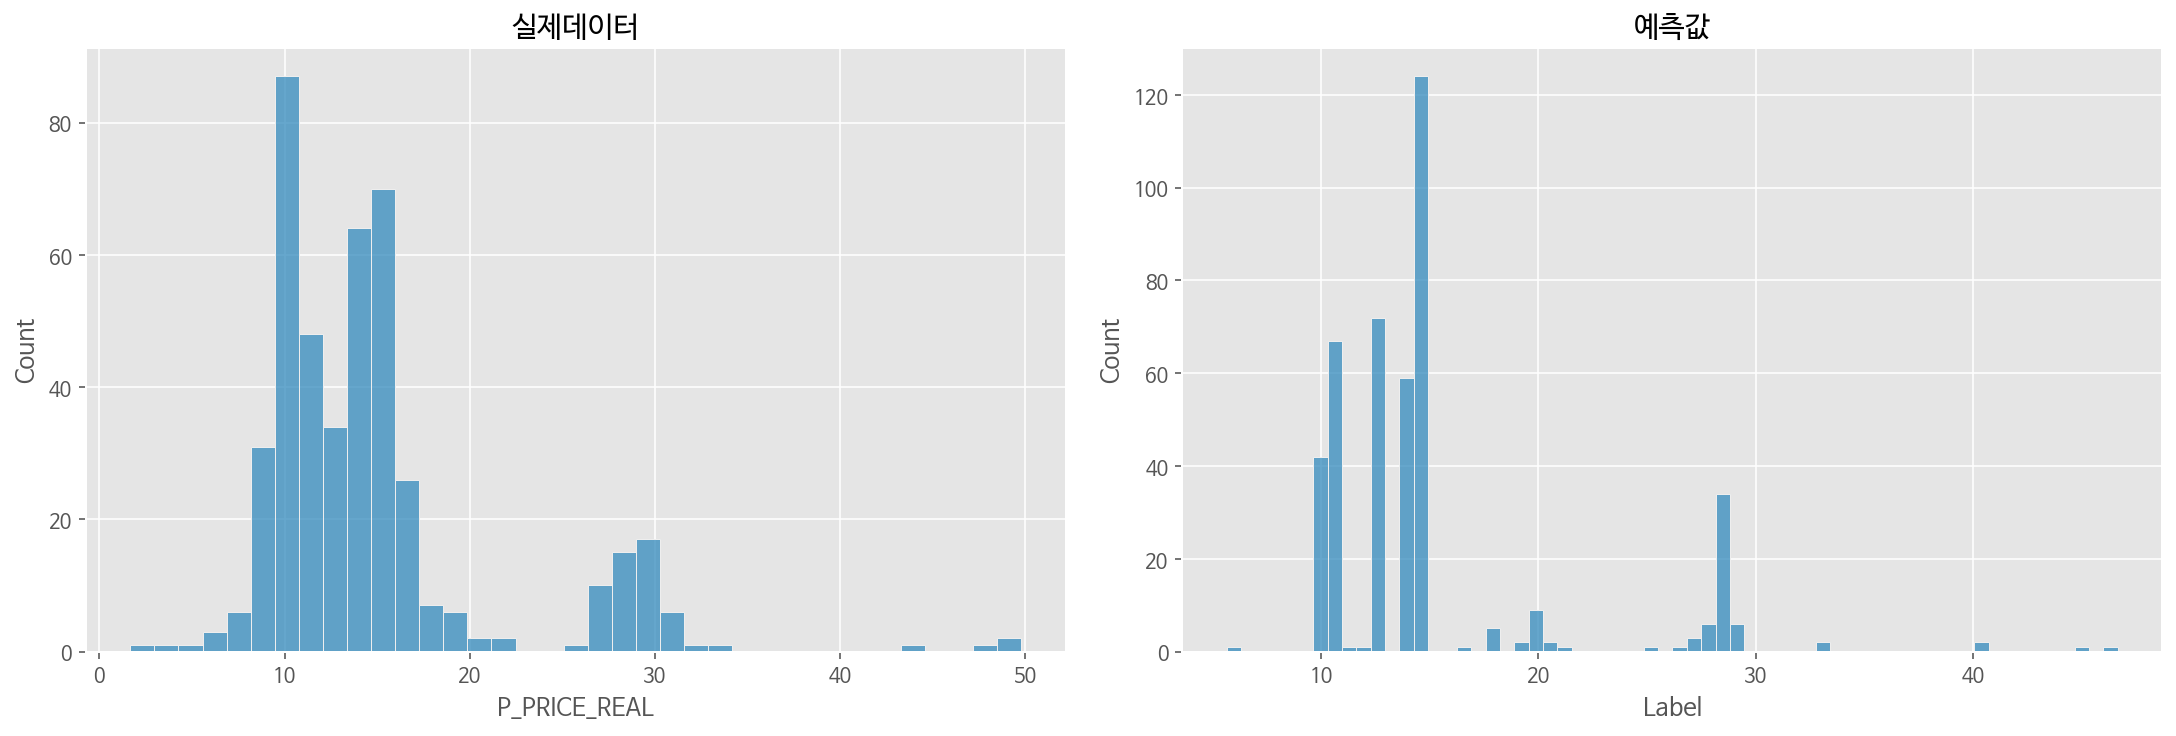

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.histplot(x='P_PRICE_REAL',data=pred_holdouts,ax=axes[0])
axes[0].set_title("실제데이터")
sns.histplot(x='Label',data=pred_holdouts,ax=axes[1])
axes[1].set_title("예측값")
plt.show()